<a href="https://colab.research.google.com/github/hidensuport/Hello-story-/blob/master/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [6]:
import zipfile

df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/us_perm_visas.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [10]:
df_select = df[["case_status", "class_of_admission","application_type"]]

,case_status,class_of_admission,application_type
0,Certified,J-1,PERM
1,Denied,B-2,PERM
2,Certified,H-1B,PERM
3,Certified,B-2,PERM
4,Certified,L-1,PERM
...,...,...,...
374357,Withdrawn,NaN,NaN
374358,Withdrawn,L-1,NaN
374359,Withdrawn,H-1B,NaN
374360,Withdrawn,B-2,NaN


# 3.) Clean your data for a decision tree

In [17]:
X = pd.get_dummies(df_select, "class_of_admission","application_type")
y = df["case_status"]

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374357    Withdrawn
374358    Withdrawn
374359    Withdrawn
374360    Withdrawn
374361    Withdrawn
Name: case_status, Length: 374362, dtype: object

# 4.) Fit and plot a decision tree of depth X

In [18]:
from sklearn import tree

In [19]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.6666666666666666, 0.875, 'class_of_admissionapplication_typeCertified <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]'),
 Text(0.5, 0.625, 'class_of_admissionapplication_typeCertified-Expired <= 0.5\ngini = 0.377\nsamples = 192429\nvalue = [0, 148586, 25649, 18194]'),
 Text(0.3333333333333333, 0.375, 'class_of_admissionapplication_typeWithdrawn <= 0.5\ngini = 0.486\nsamples = 43843\nvalue = [0, 0, 25649, 18194]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 25649\nvalue = [0, 0, 25649, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 18194\nvalue = [0, 0, 0, 18194]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 148586\nvalue = [0, 148586, 0, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 181933\nvalue = [181933, 0, 0, 0]')]

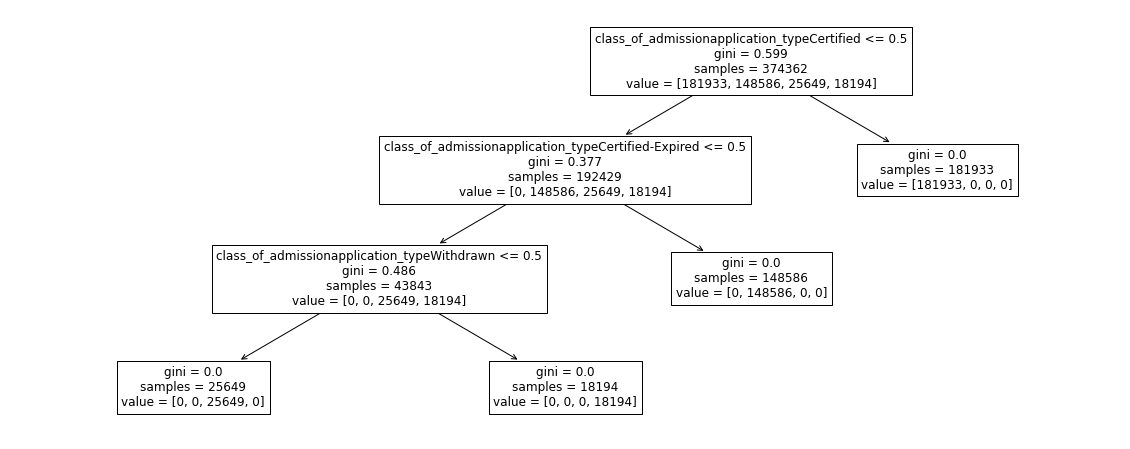

In [24]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf,feature_names = X.columns )

# 5.) Write your interpretation of the largest (by sample size) leaf node


In [25]:
# the largest sample size node is when application type certified then it is true 

#6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy¶
max_depths = [1,2,3]


In [30]:
from sklearn.model_selection import train_test_split
max_depths = [1,2,3]
outputs = []
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3)
for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)
  outputs.append(clf.score(x_test,y_test))

In [31]:
outputs

[0.8830013623129046, 0.9514731677781834, 1.0]

In [ ]:
#The best one is the one that have 3 depths